In [32]:
import rioxarray
import geopandas
import leafmap
import os
import datetime

In [33]:
out_dir = "data/_grace_tiff"
os.makedirs(out_dir, exist_ok=True)
geodf = geopandas.read_file("data/poland.geojson")
nc = rioxarray.open_rasterio("data/GRCTellus.JPL.200204_202202.GLO.RL06M.MSCNv02CRI.nc", decode_times=False)[0]
grace_start_date = datetime.datetime(2002, 1, 1)


In [34]:
nc = nc.rio.write_crs("EPSG:4326")
for lwe in nc["lwe_thickness"]:
    lwe = lwe.rio.clip(geodf.geometry.values, geodf.crs, all_touched=True)
    lwe = lwe.where(lwe>=0)
    lwe = lwe.rio.write_crs("EPSG:4326")
    lwe_datetime = grace_start_date + datetime.timedelta(days=int(lwe.time.values))
    file_name = f"{lwe_datetime.strftime('%Y-%m-%d')}.tiff"
    lwe.rio.to_raster(f"{out_dir}/{file_name}")

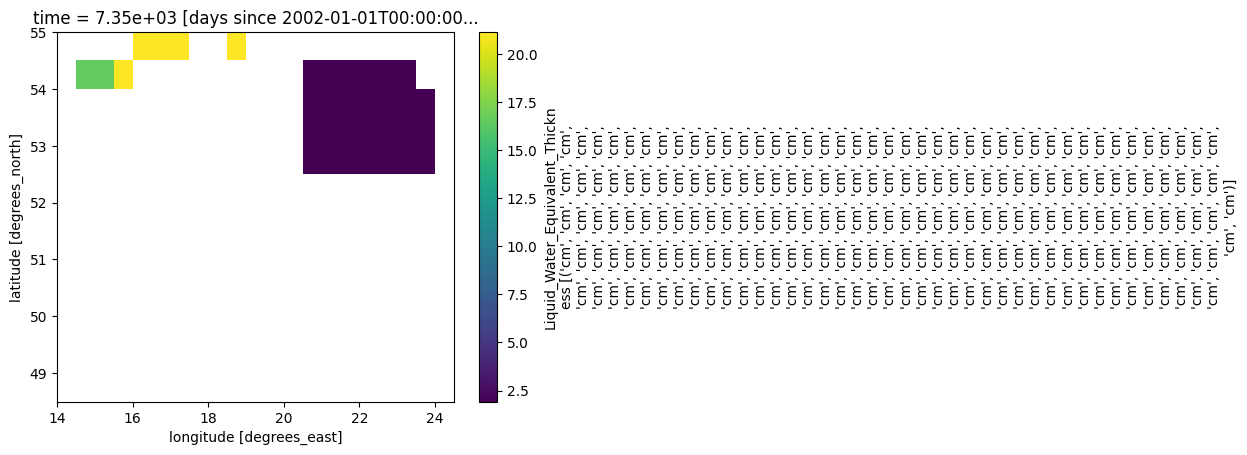

In [35]:
lwe.plot()